In [1]:
import legaltechDataProcess as ltp
import jieba.analyse
import jieba 
import pandas as pd
import numpy as np
import nltk
from collections import Counter
import re  
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import random

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/s4/pjkgkkr16cdb33gxf03ybm800000gn/T/jieba.cache
Loading model cost 0.684 seconds.
Prefix dict has been built succesfully.


# 資料處理區

In [17]:
x=pd.read_pickle("/Users/benbilly3/Desktop/Legaltech/MoreData/result.pickle")
# x['jd_money']=x['jd_money'].replace('',0).astype(int)
# x['solatium_request']=x['solatium_request'].replace('',0).astype(int)
t1=x['jd_money'].values.tolist()
t2=x['solatium_request'].values.tolist()
#法院判決金額概估，若法院金額大於請求金額，推測請求成功，打8折當保險值。
#若法院金額小於請求金額，推測請求失敗，以法院實判金額打7折當保險值。
x['jd_solatium_predict']=[b*0.8 if a>=b else a*0.7 for a,b in zip(t1,t2)]
# x.to_pickle("/Users/benbilly3/Desktop/Legaltech/MoreData/result.pickle")
x

,court,date,historyHash,judgement,mainText,no,opinion,party,reason,relatedIssues,sys,type,winOrloss,jd_money,solatium,solatium_request,keyword,keyword_opinion,jd_solatium_predict
1970,福建連江地方法院,2016-08-17T00:00:00+08:00,c74d75deba75b2c8cb3207d1910235d1,福建連江地方法院民事判決103年度訴字第9號原告盧冠華法定代理人林寶玉訴訟代理人黃正琪律師被...,原告之訴及假執行之聲請均駁回。訴訟費用由原告負擔。,"103,訴,9",三、得心證之理由：被告莊秉諺駕駛油罐車載運油品，為從事駕駛業務之人，於上揭時、地，駕駛822...,"[{'group': ['plaintiff'], 'title': '原告', 'valu...",侵權行為損害賠償,"[{'lawName': '民事訴訟法', 'issueRef': '78'}, {'law...",民事,判決,被吿勝訴,0.0,"['請求精神慰撫金130萬元', '請求精神慰撫金130萬元五總計2076543元', '原...",1300000.0,"[(油罐, 0.589751436422404), (822, 0.499121606181...","[(油罐, 0.6565305686982339), (822, 0.57240252564...",0.0
2012,福建金門地方法院,2012-02-15T00:00:00+08:00,2cb882cc11e9df8dc6d38f452f5924a3,福建金門地方法院刑事附帶民事訴訟判決100年度交附民字第5號原告蔡啟政被告李錦珠上列當事人間...,被告應給付原告新臺幣捌萬捌仟陸佰貳拾陸元，及自民國一○○年十二月十日起至清償日止，按年息百分...,"100,交附民,5",貳、實體方面一、原告主張：原告於民國100年4月15日16時20分許於金城鎮○○路金門城東門...,"[{'group': ['plaintiff'], 'title': '原告', 'valu...",損害賠償,"[{'lawName': '刑事訴訟法', 'issueRef': '4871'}, {'l...",刑事,判決,被告敗訴,88626.0,"['請求慰撫金45000元', '原告請求慰撫金45000元', '原告請求慰撫金', '原...",45000.0,"[(右膝, 0.2842469056971831), (軟化, 0.168377007083...","[(右膝, 0.30837652417741934), (軟化, 0.18267047118...",36000.0
2040,福建金門地方法院,2008-12-22T00:00:00+08:00,,福建金門地方法院刑事附帶民事訴訟判決原告甲○○被告永勝自動控制股份有限公司法定代理人丙○○訴...,被告應連帶給付原告新台幣參拾陸萬貳仟捌佰捌拾壹元及其中被告乙○○自民國九十七年九月六日起，被...,"97,城交簡附民,2","貳、實體方面：一、原告為下列主張，聲明請求：(1)被告應連帶給付原告新臺幣464,709元，...","[{'group': ['plaintiff'], 'title': '原告', 'valu...",損害賠償,"[{'lawName': '中華民國刑法', 'issueRef': '354'}, {'l...",刑事,判決,被告敗訴,362881.0,"['請求被告賠償精神慰撫金30萬元', '請求被告賠償精神慰撫金30萬元尚嫌過高應核減為25...",300000.0,"[(永勝, 0.2475408618140073), (擦傷, 0.087367362993...","[(永勝, 0.2249553024739247), (擦傷, 0.096409415345...",240000.0
2041,福建金門地方法院,2009-05-21T00:00:00+08:00,,福建金門地方法院刑事附帶民事訴訟判決97年度城交簡附民字第4號原告乙○○輔佐人丙○○被告甲○...,被告應給付原告新台幣玖萬肆仟壹佰零肆元及自民國九十七年十月十六日起至清償日止按年息百分之五計...,"97,城交簡附民,4",(二)就原告主張機車損失部分：（本院卷第49頁）1.因犯罪而受損害之人，始得於刑事訴訟程序附...,"[{'group': ['plaintiff'], 'title': '原告', 'valu...",損害賠償,"[{'lawName': '中華民國刑法', 'issueRef': '354'}, {'l...",刑事,判決,被告敗訴,94104.0,"['請求被告賠償精神慰撫金881646元尚嫌過高應核減為30萬元', '請求被告賠償精神慰撫...",881646.0,"[(679, 0.1106922916935185), (大腿, 0.09836098788...","[(679, 0.11875596857185429), (大腿, 0.0957553988...",65872.8
2049,福建金門地方法院,2010-02-04T00:00:00+08:00,09f5f13c3a5b4352bfe848bc6cf41c39,福建金門地方法院刑事附帶民事判決98年度交附民字第5號原告乙○○被告甲○○訴訟代理人沈炎平律...,被告應給付原告新臺幣拾壹萬玖仟捌佰陸拾元，及自民國九十八年九月二十六日起至清償日止，按週年利...,"98,交附民,5",(1)計程車車資及機票費用部分：原告應提出支出費用單據證明。(2)薪資損失部分：原告係任職於...,"[{'group': ['plaintiff'], 'title': '原告', 'valu...",損害賠償,"[{'lawName': '中華民國刑法', 'issueRef': '354'}, {'l...",刑事,判決,被告敗訴,119860.0,"['請求賠償精神慰撫金600000元', '原告請求賠償精神慰撫金600000元', '原告...",600000.0,"[(設有, 0.1053283480431718), (縣烈嶼, 0.08777362336...","[(薪資損失, 0.0956381400232), (就業, 0.0956381400232...",83902.0
2169,福建金門地方法院,2012-11-23T00:00:00+08:00,,福建金門地方法院民事判決101年度訴字第19號原告黃煒淩訴訟代理人李志澄律師複代理人林美伶律...,被告應給付原告新臺幣參拾壹萬肆仟參佰陸拾肆元，及自民國一百零一年七月十日起至清償日止，按週年...,"101,訴,19",三、法院之判斷：(一)兩造不爭執之事項：1.被告於100年3月3日下午8時許，駕駛車號028...,"[{'group': ['plaintiff'], 'title': '原告', 'valu...",侵權行為損害賠償,"[{'lawName': '民事訴訟法', 'issueRef': '79'}, {'law...",民事,判決,被告敗訴,314364.0,"['請求精神慰撫金150萬元', '請求精神慰撫金150萬元六前揭金額合計362萬6077元...",1500000.0,"[(除役, 0.38188205171184764), (憂鬱症, 0.1601837676...","[(除役, 0.4244844504123049), (防部, 0.191469389146...",220054.8
2170,福建金門地方法院,2014-06-10T00:00:00+08:00,,福建金門地方法院民事判決101年度訴字第26號原告吳阿娥陳順正陳李綉螺共同訴訟代理人李志澄律...,被告歐陽金福、祥業工程行即王碧珍應連帶給付原告吳阿娥新臺幣肆拾陸萬捌仟貳佰參拾壹元，及自民國...,"101,訴,26","本件已獲汽車強制責任險理賠160萬元，由原告三人平均分配，，每人受領533,333元，故此...","[{'group': ['plaintiff'], 'title': '原告', 'valu...",損害賠償,"[{'lawName': '強制汽車責任保險法', 'issueRef': '30'}, {...",民事,判決,被告敗訴,468231.0,"['請求200萬元之精神慰撫金', '請求150萬元之精神慰撫金', '請求150萬元之精神...",1500000.0,"[(詩坤, 0.35658811055161777), (歐陽, 0.21757918609...","[(詩坤, 0.38386868128577983), (歐陽, 0.19193434064...",327761.7
2174,福建金門地方法院,2012-08-30T00:00:00+08:00,,福建金門地方法院民事判決101年度訴字第38號原告許玉旋訴訟代理人黃添才黃文麟被告董淑勤上列...,被告應給付原告新臺幣貳拾壹萬貳仟參佰貳拾柒元，及自民國一０一年六月十五日起至清償日止，按週年...,"101,訴,38",四、得心證之理由：（一）按因故意或過失，不法侵害他人之權利者，負損害賠償責任，民法第184條...,"[{'group

In [18]:
a=ltp.pdColFilter(x,"judgement","小孩")
p1=a[a['winOrloss']=='被告敗訴']
p2=p1[p1['jd_money']-p1['solatium_request']>=0]

win_probability=round(len(p1)/len(a)*100,2)
solatium_satisfy_probability=round(len(p2)/len(a)*100,2)
JD_Request=round((p1['jd_money'].mean())/(p1['solatium_request'].mean()),2)
print(
      'jd_num:',len(a),
      '\nwin_probability:',win_probability,
      '\nsolatium_satisfy_probability:',solatium_satisfy_probability,
      '\nJD/request:',JD_Request,
      '\njd_money_mean:',round(p1['jd_money'].mean(),2),
     '\nsolatium_request_mean:',round(p1['solatium_request'].mean(),2))

jd_num: 965 
win_probability: 89.53 
solatium_satisfy_probability: 33.99 
JD/request: 0.9 
jd_money_mean: 802851.0 
solatium_request_mean: 896770.77


In [19]:
D=ltp.pdTupleToDf(a["keyword"],"keyword","tfidf_value")
sector = D.groupby("keyword").sum()
d=D.sort_values(["tfidf_value"])
count = Counter(d['keyword']).most_common(500)
count=ltp.pdTupleToDf2(count,"keyword","count")
count['ratio']=round(count['count']/len(a)*100,2)
count

,keyword,count,ratio
0,看護費,437,45.28
1,骨折,211,21.87
2,工作損失,163,16.89
3,最高法院,134,13.89
4,頭部,120,12.44
5,不能,104,10.78
6,擦傷,93,9.64
7,性骨折,88,9.12
8,先行,83,8.60
9,霍夫曼,74,7.67


# 指標函式

In [20]:
x=pd.read_pickle("/Users/benbilly3/Desktop/Legaltech/MoreData/result.pickle")

def jdReport(dataframe,col_name,*args):
    for key in args:
        select=dataframe[col_name].values.tolist()
        a=[key in i for i in select]
        dataframe=dataframe[a]
        
    p1=dataframe[dataframe['winOrloss']=='被告敗訴']
    p2=p1[p1['jd_money']-p1['solatium_request']>=0]

    win_probability=round(len(p1)/len(dataframe)*100,2)
    solatium_satisfy_probability=round(len(p2)/len(dataframe)*100,2)
    JD_Request=round((dataframe['jd_money'].mean())/(dataframe['solatium_request'].mean()),2)
    data={
          'jd_num':len(dataframe),
          'win_probability':win_probability,
          'solatium_satisfy_probability':solatium_satisfy_probability,
          'JD/request':JD_Request,
          'jd_money_mean':round(dataframe['jd_money'].mean(),2),
         'solatium_request_mean':round(dataframe['solatium_request'].mean(),2)
          }
    name='&'.join([key for key in args])

    return pd.DataFrame(data,index=[name])

jdReport(x,"judgement",'扶養')


,jd_num,win_probability,solatium_satisfy_probability,JD/request,jd_money_mean,solatium_request_mean
扶養,2872,88.41,29.25,0.68,1244061.85,1831186.13


In [21]:
jdReport(x,"judgement",'植物人')

,jd_num,win_probability,solatium_satisfy_probability,JD/request,jd_money_mean,solatium_request_mean
植物人,436,85.55,46.79,1.58,4191437.08,2660129.53


# 測試重要關鍵字

In [23]:
keylist=pd.read_csv('/Users/benbilly3/Desktop/Legaltech/MoreData/plaintiff_win_300up_commonword.csv')
keylist=keylist['keyword'].values[:100]
keylist

array(['看護費', '霍夫曼', '骨折', '癱瘓', '植物人', '出血', '頭部', '嚴重', '終身', '自理',
       '肢體', '最高法院', '平均', '重型機車', '能力', '所不爭執', '程度', '四肢', '協助', '下肢',
       '失能', '監護', '實際', '年齡', '脊髓', '重傷', '不能', '勞動力', '道路交通', '用品',
       '顱骨', '缺損', '日常生活', '全日', '腦膜', '負連帶', '輪椅', '單利', '算法', '判例',
       '無力', '先行', '0000000000', '扶養費', '普通重型機車', '撫金', '功能', '受僱', '經濟',
       '每日', '傷合', '重傷害', '支付', '交重', '偏癱', '生命表', '累計', '機能', '是否', '增加',
       '安全措施', '時速', '濃度', '重大', '終結', '昏迷', '創傷', '義務', '語言', '187',
       '顱內', '終生', '重度', '尚有', '伍拾', '尿布', '截肢', '審交重', '護理', '輔助',
       '每月薪資', '工作損失', '判斷', '僱用', '192', '利者', '行駛至', '薪資損失', '交附民字',
       '047', '日生', '扣繳', '基礎', '49', '開規定', '此為', '斟酌', '胸椎', '障害', '不爭'],
      dtype=object)

In [24]:
def jdReport_list(dataframe,col_name,key_list):
    d=[]
    for k in keylist:
        data= jdReport(dataframe,col_name,k)
        d.append(data)
    return pd.concat(d)
df=jdReport_list(x,"judgement",keylist)

In [25]:
df.sort_values(['JD/request'],ascending=False)

,jd_num,win_probability,solatium_satisfy_probability,JD/request,jd_money_mean,solatium_request_mean
脊髓,482,86.93,46.06,1.89,3127058.38,1658723.00
癱瘓,584,88.87,50.17,1.81,4575158.02,2525697.45
尿布,442,91.40,47.06,1.79,3590743.79,2003283.84
偏癱,234,91.45,51.28,1.76,3996741.02,2275260.95
胸椎,373,90.08,39.95,1.63,2196183.00,1346335.64
終生,730,92.33,49.86,1.60,3220442.66,2019042.95
植物人,436,85.55,46.79,1.58,4191437.08,2660129.53
截肢,233,87.12,45.92,1.52,2560351.75,1680924.94
監護,680,85.59,41.76,1.52,3035084.49,1997916.00
語言,379,90.24,46.17,1.49,2967002.79,1985403.93


# 慰撫金請求金額直方圖

查詢各條件交集變化

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


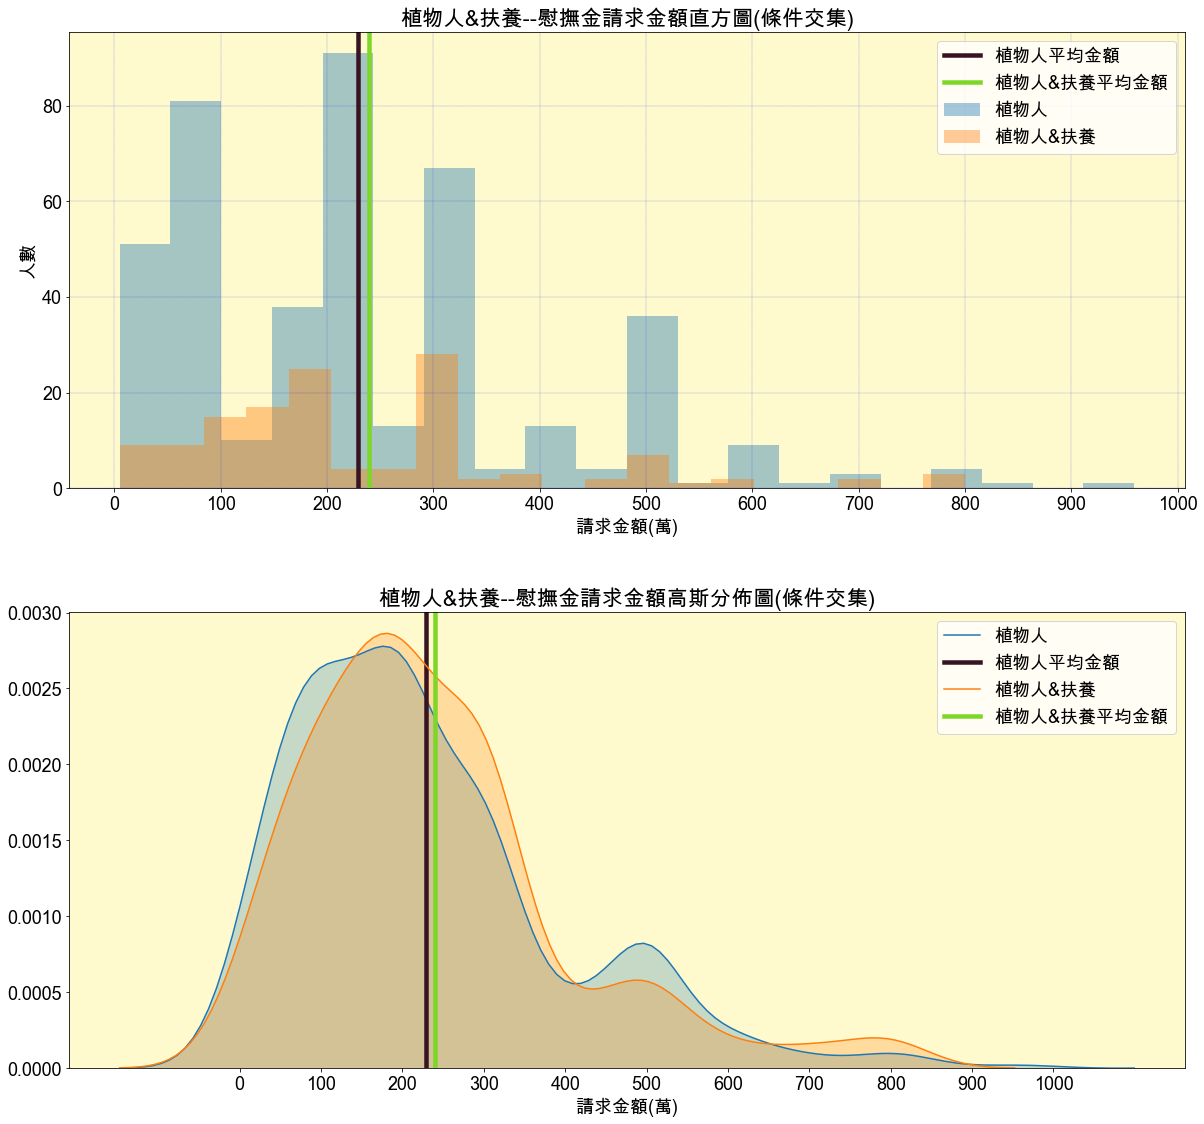

In [11]:
x=pd.read_pickle("/Users/benbilly3/Desktop/Legaltech/MoreData/result.pickle")

def jdReportHist(dataframe,col_name,*args):
    
    label_name=[]
    for key in args:
        select=dataframe[col_name].values.tolist()
        a=[key in i for i in select]
        dataframe=dataframe[a]
        dataframe=dataframe[dataframe['solatium_request']<10000000]
        x=dataframe['solatium_request'].values/10000
        
        plt.rcParams['font.family']=['Arial Unicode MS']
        plt.rcParams['font.size']=18
        plt.rcParams["figure.figsize"] = (20,12)
        plt.subplots_adjust(left=None, bottom=0.3, right=None, top=1.5,hspace = .27, wspace=.2)
        c = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])for i in range(1)]
        
        #處理label
        label_name.append(key)
        try:
            label_name2='&'.join(label_name)
        except:
            label_name2=label_name[0]
        
        plt.subplot(2,1,1,facecolor='lemonchiffon')
        ax= sns.distplot(x,bins=20,label=label_name2,kde=False)
        plt.xticks(range(0,1100,100))
        plt.ylabel('人數')
        plt.xlabel('請求金額(萬)')
        name='&'.join([key for key in args])
        plt.title(name+'--慰撫金請求金額直方圖(條件交集)')
        p=x.mean()
        plt.axvline(x=p,linewidth=4.5,color=c[0],label=label_name2+'平均金額')
        plt.legend()
        plt.grid(color='b', linestyle='--', linewidth=0.2)
        ax.legend()
        
        plt.subplot(2,1,2,facecolor='lemonchiffon')
        ax1= sns.kdeplot(x, shade=True,label=label_name2)
        plt.xticks(range(0,1100,100))
        plt.xlabel('請求金額(萬)')
        plt.title(name+'--慰撫金請求金額高斯分佈圖(條件交集)')
        plt.axvline(x=p,linewidth=4.5,color=c[0],label=label_name2+'平均金額')
        ax1.legend()

jdReportHist(x,"judgement",'植物人','扶養')




/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


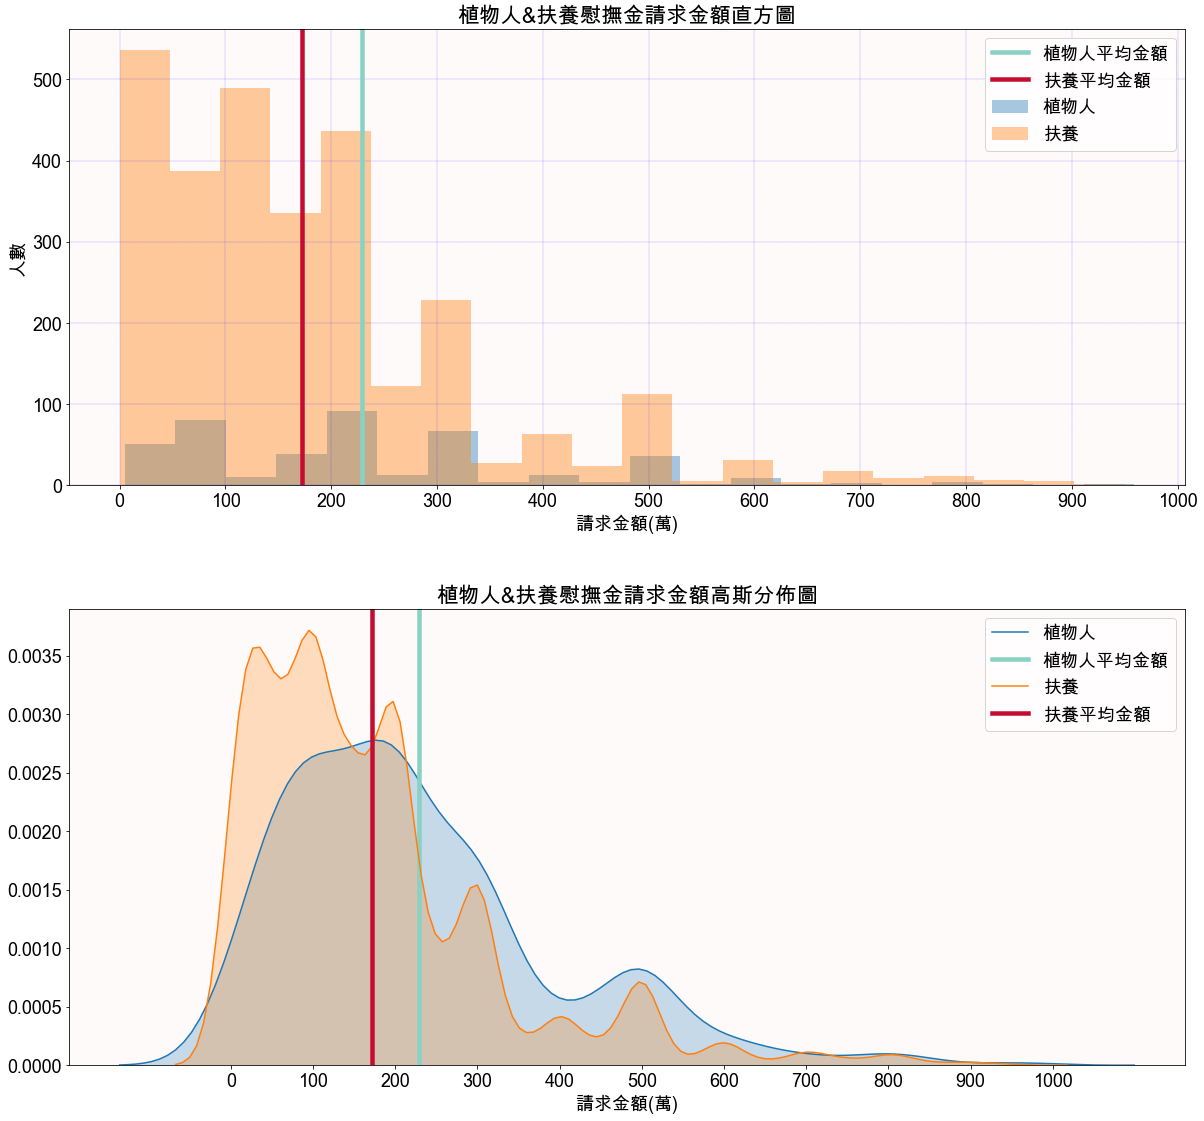

In [12]:
x=pd.read_pickle("/Users/benbilly3/Desktop/Legaltech/MoreData/result.pickle")

def jdReportHistGaussian(dataframe,col_name,*args):
    for key in args:
        select=dataframe[col_name].values.tolist()
        a=[key in i for i in select]
        df2=dataframe[a]
        df2=df2[df2['solatium_request']<10000000]
        
        x=df2['solatium_request'].values/10000
        
        plt.rcParams['font.family']=['Arial Unicode MS']
        plt.rcParams['font.size']=18
        plt.rcParams["figure.figsize"] = (20,12)
        plt.subplots_adjust(left=None, bottom=0.3, right=None, top=1.5,hspace = .27, wspace=.2)
        c = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])for i in range(1)]
        plt.subplot(2,1,1,facecolor='snow')
        ax= sns.distplot(x,bins=20,label=key,kde=False)
        p=x.mean()
        plt.axvline(x=p,linewidth=4.5,color=c[0],label=key+'平均金額')
        plt.xticks(range(0,1100,100))
        plt.ylabel('人數')
        plt.xlabel('請求金額(萬)')
        name='&'.join([key for key in args])
        plt.title(name+'慰撫金請求金額直方圖')
        plt.grid(color='b', linestyle='--', linewidth=0.2)
        ax.legend()
        
        plt.subplot(2,1,2,facecolor='snow')
        ax1= sns.kdeplot(x, shade=True,label=key)
        plt.axvline(x=p,linewidth=4.5,color=c[0],label=key+'平均金額')
        plt.xticks(range(0,1100,100))
        plt.xlabel('請求金額(萬)')
        plt.title(name+'慰撫金請求金額高斯分佈圖')
        ax1.legend()

jdReportHistGaussian(x,"judgement",'植物人','扶養')

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


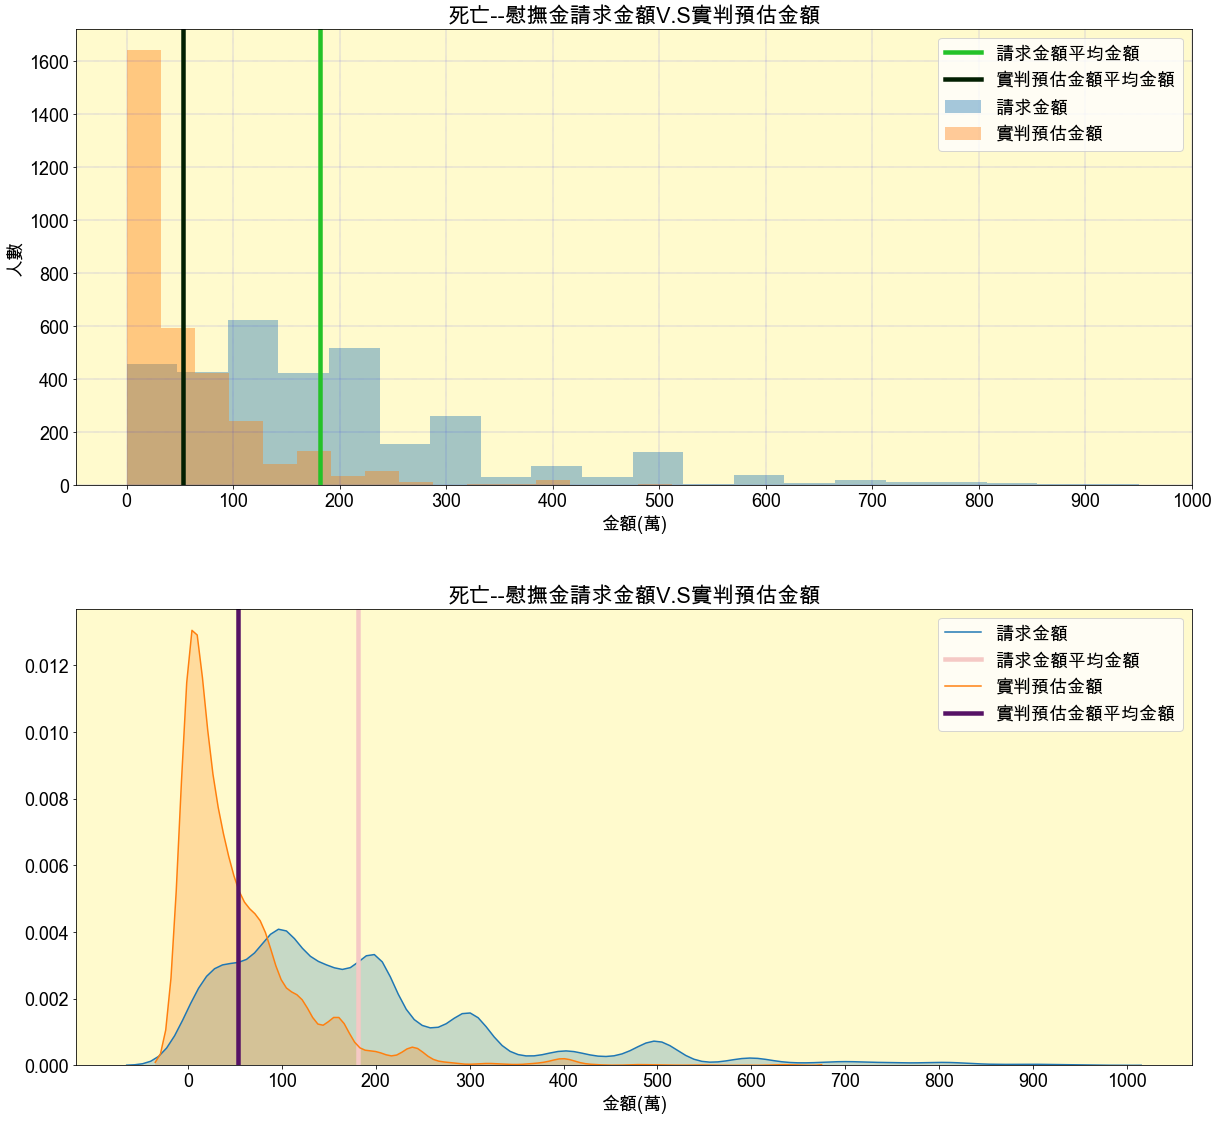

In [13]:
def jdReportHistRealPredict(dataframe,col_name,*args):
    
    title_name='&'.join([key for key in args])
    for keyword in args:
        select=dataframe[col_name].values.tolist()
        a=[keyword in i for i in select]
        dataframe=dataframe[a]
    
    for i in ['solatium_request','jd_solatium_predict']:
        dataframe=dataframe[dataframe[i]<10000000]
        x=dataframe[i].values/10000

        plt.rcParams['font.family']=['Arial Unicode MS']
        plt.rcParams['font.size']=18
        plt.rcParams["figure.figsize"] = (20,12)
        plt.subplots_adjust(left=None, bottom=0.3, right=None, top=1.5,hspace = .27, wspace=.2)
        c = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])for i in range(1)]
        c2 = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])for i in range(1)]
        
        plt.subplot(2,1,1,facecolor='lemonchiffon')
        if i=='solatium_request':
            name='請求金額'
        else:
            name='實判預估金額'
        ax= sns.distplot(x,bins=20,label=name,kde=False)
        plt.xticks(range(0,1100,100))
        plt.ylabel('人數')
        plt.xlabel('金額(萬)')
        plt.title(title_name+'--慰撫金請求金額V.S實判預估金額')
        p=x.mean()
        plt.axvline(x=p,linewidth=4.5,color=c[0],label=name+'平均金額')
        plt.legend()
        plt.grid(color='b', linestyle='--', linewidth=0.2)
        ax.legend()
        
        plt.subplot(2,1,2,facecolor='lemonchiffon')
        ax1= sns.kdeplot(x, shade=True,label=name)
        plt.xticks(range(0,1100,100))
        plt.xlabel('金額(萬)')
        plt.title(title_name+'--慰撫金請求金額V.S實判預估金額')
        plt.axvline(x=p,linewidth=4.5,color=c2[0],label=name+'平均金額')
        ax1.legend()

jdReportHistRealPredict(x,"judgement",'死亡')

# 法院案件統計圖

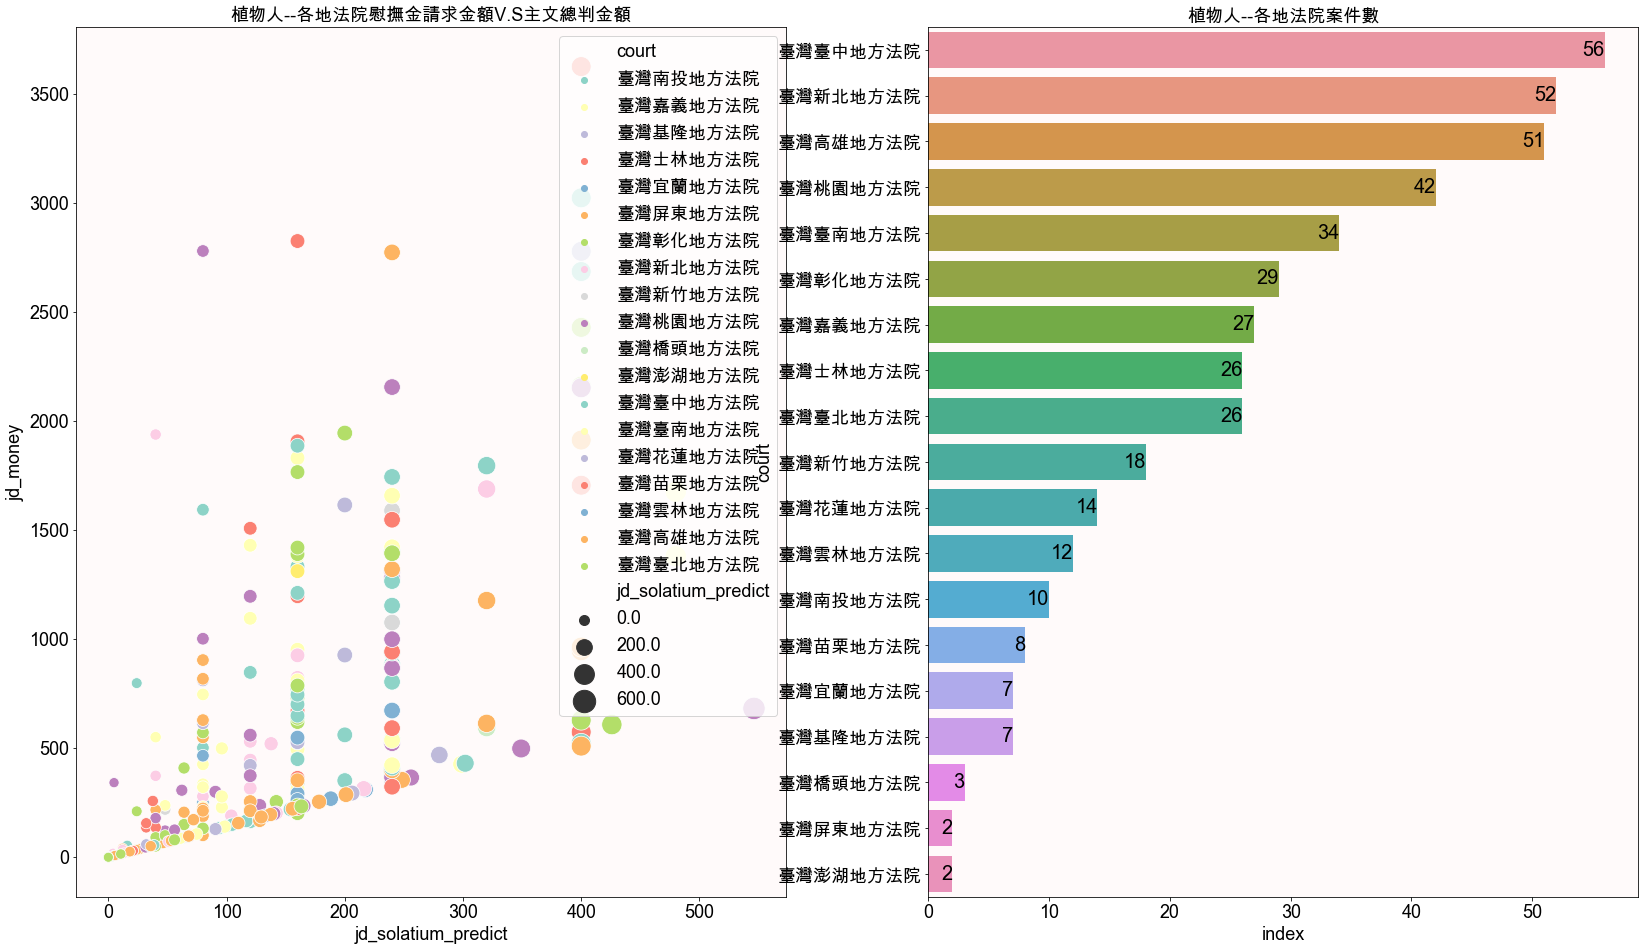

In [26]:
df=pd.read_pickle("/Users/benbilly3/Desktop/Legaltech/MoreData/result.pickle")

def jdReportScatterRealPredict(df,col_name,*args):
    df=df.reset_index()
    df=df[df['solatium_request']<10000000]
    df=df[df['jd_money']<50000000]
    df['solatium_request']=df['solatium_request']/10000
    df['jd_solatium_predict']=df['jd_solatium_predict']/10000
    df['jd_money']=df['jd_money']/10000
    for keyword in args:
        select=df[col_name].values.tolist()
        a=[keyword in i for i in select]
        df=df[a]
    plt.rcParams['font.family']=['Arial Unicode MS']
    plt.rcParams['font.size']=18
    plt.rcParams["figure.figsize"] = (28,16)
    
    #請求金額與主文判決總金額散點圖
    plt.subplot(1,2,1,facecolor='snow')
    name='&'.join([key for key in args])
    cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
    ax = sns.scatterplot(x="jd_solatium_predict", y="jd_money",
                         hue="court", size="jd_solatium_predict",sizes=(100, 500),
                         palette="Set3",data=df)
    plt.title(name+'--各地法院慰撫金請求金額V.S主文總判金額',fontsize='medium')
    
    plt.subplot(1,2,2,facecolor='snow')
    df2=df.groupby('court').count()
    df2=df2.iloc[:,0:1]
    df2=df2.sort_values('index',ascending=False)
    df2=df2.reset_index()
    ax2 = sns.barplot(x="index", y="court", data=df2)
    plt.title(name+'--各地法院案件數',fontsize='medium')
    
    #標籤
    for x, y, tex in zip(df2['index'], df2.index, df2['index']):
        t = plt.text(x, y,int(tex), horizontalalignment='right', 
                     verticalalignment='center', fontdict={'color':'black', 'size':20})
        

jdReportScatterRealPredict(x,"judgement",'植物人')

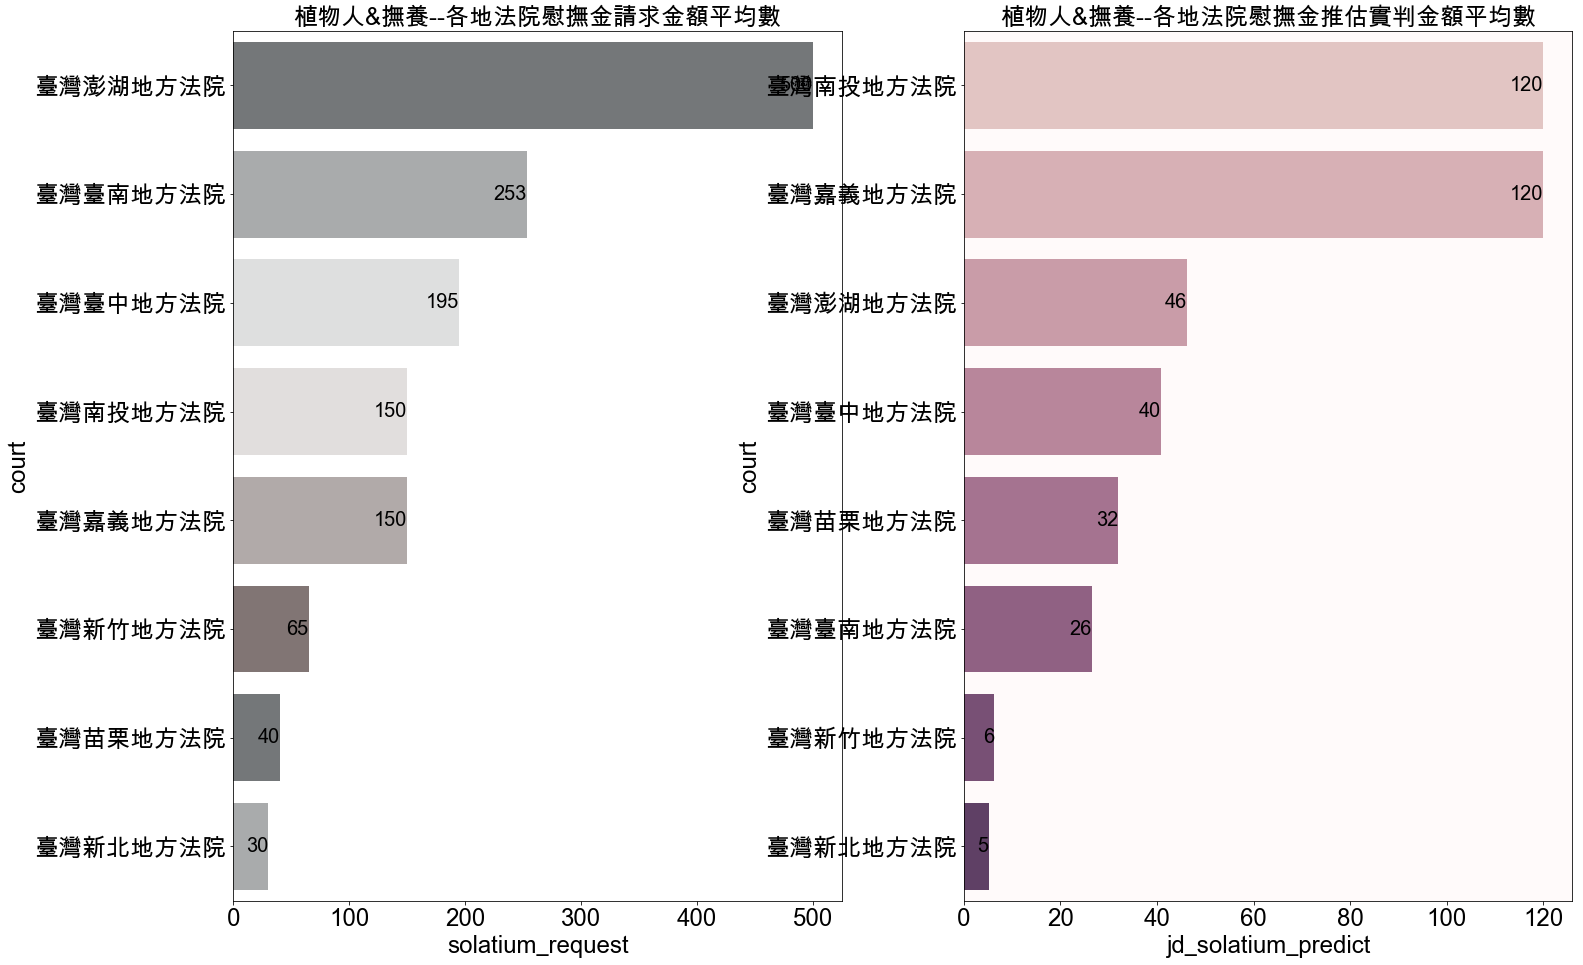

In [15]:
df=pd.read_pickle("/Users/benbilly3/Desktop/Legaltech/MoreData/result.pickle")

def jdReportBarRealPredict(df,col_name,*args):
    df=df.reset_index()
    df=df[df['solatium_request']<10000000]
    df=df[df['jd_money']<50000000]
    df['solatium_request']=df['solatium_request']/10000
    df['jd_solatium_predict']=df['jd_solatium_predict']/10000
    df['jd_money']=df['jd_money']/10000
    for keyword in args:
        select=df[col_name].values.tolist()
        a=[keyword in i for i in select]
        df=df[a]
    plt.rcParams['font.family']=['Arial Unicode MS']
    plt.rcParams['font.size']=24
    plt.rcParams["figure.figsize"] = (24,16)

    plt.subplot(1,2,1)
    df2=df.groupby('court').mean()
    df2=df2.sort_values('solatium_request',ascending=False)
    df2=df2.iloc[:,2:3]
    df2=df2.reset_index()
    name='&'.join([key for key in args])
    cmap=sns.diverging_palette(220, 20, len(df2))
    ax2 = sns.barplot(x="solatium_request", y="court",palette=cmap, data=df2)
    plt.title(name+'--各地法院慰撫金請求金額平均數',fontsize='medium')
    for x, y, tex in zip(df2['solatium_request'], df2.index, df2['solatium_request']):
        t = plt.text(x, y,int(tex), horizontalalignment='right', 
                     verticalalignment='center', fontdict={'color':'black', 'size':20})
    
    
    plt.subplot(1,2,2,facecolor='snow')
    df2=df.groupby('court').mean()
    df2=df2.sort_values('jd_solatium_predict',ascending=False)
    df2=df2.iloc[:,3:4]
    df2=df2.reset_index()
    cmap=sns.cubehelix_palette(len(df2),dark=.3, light=.8)

    ax2 = sns.barplot(x="jd_solatium_predict", y="court",palette=cmap, data=df2)
    plt.title(name+'--各地法院慰撫金推估實判金額平均數',fontsize='medium')
    for x, y, tex in zip(df2['jd_solatium_predict'], df2.index, df2['jd_solatium_predict']):
        t = plt.text(x, y,int(tex), horizontalalignment='right', 
                     verticalalignment='center', fontdict={'color':'black', 'size':20})
#     return df2
        
    
jdReportBarRealPredict(x,"judgement",'植物人','撫養')